In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/balanced_filtered_tweet_emotions.csv")
df.head()

,Unnamed: 0,emotion,content,updated_content
0,0,neutral,@FOOLYWANG I hope so too. How are you?,hope
1,4,neutral,I don't think I've ever been so tierd in my li...,dont think give tire lifeughgoodnightso sleep ...
2,7,neutral,"@nkotbgadget Follow me please, so I can DM you...",follow do
3,20,neutral,@RainyCityLove I like that Tehe x,like the x
4,29,neutral,@pcsketch It would be cheaper to take on The S...,cheaper spirit tasmania (the ship island on) b...


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

cols_ = list(df.columns)
df = df.sample(frac=1).reset_index()
df = df[cols_]

X = df["updated_content"]
y = df["emotion"]
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=2)
train = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.20, random_state = 42, stratify=y)

train_features = X_train
test_features = X_test
train_target = y_train
test_target = y_test


In [ ]:

gs_lr= GridSearchCV(LogisticRegression(),{
    'penalty': ["l2"],
    "solver": ["liblinear", "lbfgs"]
    }, cv=5, return_train_score=False)
gs_lr.fit(train_features, train_target)
gs_lr_df = pd.DataFrame(gs_lr.cv_results_)
best_lr = gs_lr_df[gs_lr_df["mean_test_score"] == gs_lr_df["mean_test_score"].max()]
lr_solver_param = best_lr["param_solver"]
lr_penalty_param = best_lr["param_penalty"]
best_lr.head()

#Testing the LogReg Model with best parameters obtained
LogReg_train_preds = gs_lr.predict(train_features)



Accuracy with LogReg model's Train Data 0.7983008181246066
              precision    recall  f1-score   support

   happiness      0.778     0.852     0.814       799
        hate      0.850     0.821     0.835       798
     neutral      0.769     0.734     0.751       783
     sadness      0.798     0.784     0.791       798

    accuracy                          0.798      3178
   macro avg      0.799     0.798     0.798      3178
weighted avg      0.799     0.798     0.798      3178

F1_Score Train LogReg 0.7983008181246066
Accuracy with LogReg model's Test Data 0.5144654088050314
              precision    recall  f1-score   support

   happiness      0.571     0.620     0.595       200
        hate      0.558     0.550     0.554       200
     neutral      0.438     0.415     0.426       195
     sadness      0.480     0.470     0.475       200

    accuracy                          0.514       795
   macro avg      0.512     0.514     0.512       795
weighted avg      0.512    

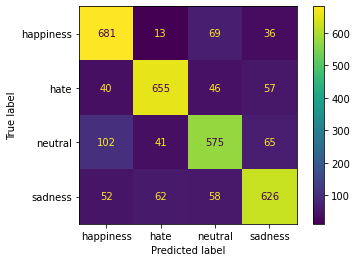

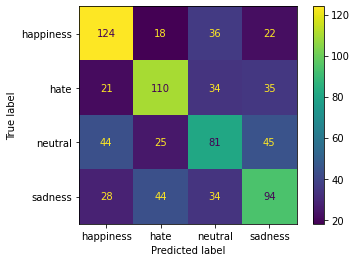

In [ ]:
# print(confusion_matrix(train_target, LogReg_train_preds))
plot_confusion_matrix(gs_lr, train_features, train_target)
print("Accuracy with LogReg model's Train Data ", end="")
accuracy_LogReg_train = accuracy_score(train_target, LogReg_train_preds)
print(accuracy_LogReg_train)
print(classification_report(train_target, LogReg_train_preds, digits=3))
f1_LogReg_train = f1_score(train_target, LogReg_train_preds, average='micro')
print("F1_Score Train LogReg {}".format(f1_LogReg_train))

LogReg_test_preds = gs_lr.predict(test_features)

# print(confusion_matrix(test_target, LogReg_test_preds))
plot_confusion_matrix(gs_lr, test_features, test_target)
print("Accuracy with LogReg model's Test Data ", end="")
accuracy_LogReg_test = accuracy_score(test_target, LogReg_test_preds)
print(accuracy_LogReg_test)
print(classification_report(test_target, LogReg_test_preds, digits=3))
f1_LogReg_test = f1_score(test_target, LogReg_test_preds, average='micro')
print("F1_Score Test LogReg {}".format(f1_LogReg_test))


In [ ]:
len(tfidf.get_feature_names())

3344

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile

import warnings
warnings.filterwarnings('ignore')


def experiment_Logistic(val):
  #Feature Selection with Select K Best and Chi2 Test
  X_new = SelectKBest(chi2, k=val).fit_transform(train, y)
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42, stratify=y)
 
  gs_lr= GridSearchCV(LogisticRegression(),{
      'penalty': ["l2"],
      "solver": ["liblinear", "lbfgs"]
      }, cv=5, return_train_score=False)
  gs_lr.fit(X_train, y_train)
  gs_lr_df = pd.DataFrame(gs_lr.cv_results_)
  best_lr = gs_lr_df[gs_lr_df["mean_test_score"] == gs_lr_df["mean_test_score"].max()]
  lr_solver_param = best_lr["param_solver"]
  lr_penalty_param = best_lr["param_penalty"]
  # best_lr.head()

  #Testing the LogReg Model with best parameters obtained
  LogReg_train_preds_fs = gs_lr.predict(X_train)

  # print(confusion_matrix(train_target, LogReg_train_preds))
  # plot_confusion_matrix(gs_lr, X_train, y_train)
  # print("Accuracy with LogReg model's Train Data After Feature Selection", end="")
  accuracy_LogReg_train_fs = accuracy_score(y_train, LogReg_train_preds_fs)
  # print(accuracy_LogReg_train_fs)
  # print(classification_report(y_train, LogReg_train_preds_fs, digits=3))
  f1_LogReg_train_fs = f1_score(y_train, LogReg_train_preds_fs, average='micro')
  # print("F1_Score Train LogReg {}".format(f1_LogReg_train_fs))

  LogReg_test_preds_fs = gs_lr.predict(X_test)

  # print(confusion_matrix(test_target, LogReg_test_preds))
  # plot_confusion_matrix(gs_lr, X_test, y_test)
  # print("Accuracy with LogReg model's Test Data After Feature Selection", end="")
  accuracy_LogReg_test_fs = accuracy_score(y_test, LogReg_test_preds_fs)
  # print(accuracy_LogReg_test_fs)
  # print(classification_report(y_test, LogReg_test_preds_fs, digits=3))
  f1_LogReg_test_fs = f1_score(y_test, LogReg_test_preds_fs, average='micro')
  # print("F1_Score Train LogReg {}".format(f1_LogReg_test_fs))
  return accuracy_LogReg_train_fs, accuracy_LogReg_test_fs, f1_LogReg_train_fs, f1_LogReg_test_fs

from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
# def experiment_VT_Logistic(val):
#   constant_filter = VarianceThreshold()
#   X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.20, random_state = 42, stratify=y)

#   constant_filter.fit(X_train)
#   X_train_filter = constant_filter.transform(X_train)
#   X_test_filter = constant_filter.transform(X_test)
#   X_train_T = X_train_filter.T
#   X_test_T = X_test_filter.T
#   X_train_T = pd.DataFrame(X_train_T)
#   X_test_T = pd.DataFrame(X_test_T)
#   duplicated_features = X_train_T.duplicated()
#   features_to_keep = [not index for index in duplicated_features]
#   X_train_unique = X_train_T[features_to_keep].T
#   X_test_unique = X_test_T[features_to_keep].T
#   mi = mutual_info_classif(X_train_unique, y_train) 

#   sel = SelectPercentile(mutual_info_classif, percentile=val).fit(X_train_unique, y_train)
#   X_train = sel.transform(X_train_unique)
#   X_test = sel.transform(X_test_unique)
#   gs_lr= GridSearchCV(LogisticRegression(),{
#       'penalty': ["l2"],
#       "solver": ["liblinear", "lbfgs"]
#       }, cv=5, return_train_score=False)
#   gs_lr.fit(X_train, y_train)

#   gs_lr_df = pd.DataFrame(gs_lr.cv_results_)
#   best_lr = gs_lr_df[gs_lr_df["mean_test_score"] == gs_lr_df["mean_test_score"].max()]
#   lr_solver_param = best_lr["param_solver"]
#   lr_penalty_param = best_lr["param_penalty"]
#   LogReg_train_preds_fs = gs_lr.predict(X_train)
#   accuracy_LogReg_train_fs = accuracy_score(y_train, LogReg_train_preds_fs)
#   f1_LogReg_train_fs = f1_score(y_train, LogReg_train_preds_fs, average='micro')
#   LogReg_test_preds_fs = gs_lr.predict(X_test)
#   accuracy_LogReg_test_fs = accuracy_score(y_test, LogReg_test_preds_fs)
#   f1_LogReg_test_fs = f1_score(y_test, LogReg_test_preds_fs, average='micro')

#   return accuracy_LogReg_train_fs, accuracy_LogReg_test_fs, f1_LogReg_train_fs, f1_LogReg_test_fs


In [ ]:
import numpy as np
maxi_lg = 1
max_ac_test_lg = 0
features_log_K = list()
train_acc_log_K = list()
test_acc_log_K = list()
train_f1_log_K = list()
test_f1_log_K = list()

for i in np.arange(1, 1500, 50):
  ac_train, ac_test, f1_train, f1_test = experiment_Logistic(i)
  train_acc_log_K.append(ac_train)
  test_acc_log_K.append(ac_test)
  train_f1_log_K.append(f1_train)
  test_f1_log_K.append(f1_test)
  if ac_test > max_ac_test_lg:
    maxi_lg = i
    max_ac_test_lg = ac_test
print(maxi_lg, max_ac_test_lg)
best_lr_ac_train, best_lr_ac_test, best_lr_f1_train, best_lr_f1_test = experiment_Logistic(maxi_lg)
print("Best Metric Details After Feature Selection is")
print("Train Accuracy {}".format(best_lr_ac_train))
print("Test Accuracy {}".format(best_lr_ac_test))
print("Train F1 Score {}".format(best_lr_f1_train))
print("Test F1 Score {}".format(best_lr_f1_test))

1151 0.5937106918238994
Best Metric Details After Feature Selection is
Train Accuracy 0.6928886091881686
Test Accuracy 0.5937106918238994
Train F1 Score 0.6928886091881686
Test F1 Score 0.5937106918238994


In [ ]:
# import numpy as np
# maxi_lg = 1
# max_ac_test_lg = 0
# train_acc_log_vt = list()
# test_acc_log_vt = list()
# train_f1_log_vt = list()
# test_f1_log_vt = list()
# for i in [10, 20, 30, 40, 50]:
#   ac_train, ac_test, f1_train, f1_test = experiment_VT_Logistic(i)
#   train_acc_log_vt.append(ac_train)
#   test_acc_log_vt.append(ac_test)
#   train_f1_log_vt.append(f1_train)
#   test_f1_log_vt.append(f1_test)
#   if ac_test > max_ac_test_lg:
#     maxi_lg = i
#     max_ac_test_lg = ac_test
# print(maxi_lg, max_ac_test_lg)
# best_lr_ac_train_vt, best_lr_ac_test_vt, best_lr_f1_train_vt, best_lr_f1_test_vt = experiment_VT_Logistic(maxi_lg)
# print("Best Metric Details After Feature Selection vt is")
# print("Train Accuracy vt {}".format(best_lr_ac_train_vt))
# print("Test Accuracy vt {}".format(best_lr_ac_test_vt))
# print("Train F1 Score vt {}".format(best_lr_f1_train_vt))
# print("Test F1 Score vt {}".format(best_lr_f1_test_vt))

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.20, random_state = 42, stratify=y)

gs_rf= GridSearchCV(RandomForestClassifier(),{
 'n_estimators': [200, 400,]}, cv=5, return_train_score=False)
gs_rf.fit(X_train, y_train)
gs_rf_df = pd.DataFrame(gs_rf.cv_results_)
best_rf = gs_rf_df[gs_rf_df["mean_test_score"] == gs_rf_df["mean_test_score"].max()]
rf_estimators_param = best_rf["param_n_estimators"]



Accuracy with RandForest model's Train Data0.9893014474512272
              precision    recall  f1-score   support

   happiness      0.992     0.987     0.990       799
        hate      0.997     0.995     0.996       798
     neutral      0.971     0.991     0.981       783
     sadness      0.996     0.984     0.990       798

    accuracy                          0.989      3178
   macro avg      0.989     0.989     0.989      3178
weighted avg      0.989     0.989     0.989      3178

F1_Score Train SVM 0.9893014474512272
Accuracy with RandForest model's Test Data After Feature Selection0.5132075471698113
              precision    recall  f1-score   support

   happiness      0.525     0.580     0.551       200
        hate      0.652     0.515     0.575       200
     neutral      0.410     0.523     0.459       195
     sadness      0.521     0.435     0.474       200

    accuracy                          0.513       795
   macro avg      0.527     0.513     0.515       795


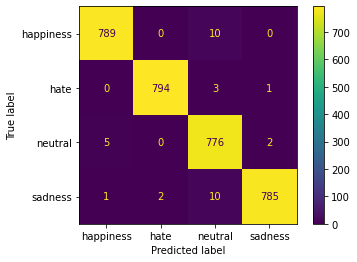

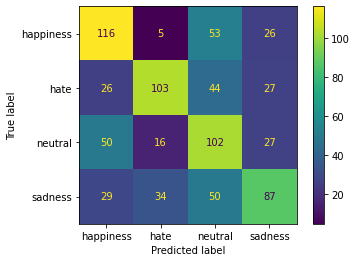

In [ ]:
#Testing the RandForest Model with best parameters obtained
RandForest_train_preds = gs_rf.predict(X_train)

# print(confusion_matrix(train_target, RandForest_train_preds))
plot_confusion_matrix(gs_rf, X_train, y_train)
print("Accuracy with RandForest model's Train Data", end="")
accuracy_RandForest_train = accuracy_score(y_train, RandForest_train_preds)
print(accuracy_RandForest_train)
print(classification_report(y_train, RandForest_train_preds, digits=3))
f1_rf_train = f1_score(y_train, RandForest_train_preds, average='micro')
print("F1_Score Train SVM {}".format(f1_rf_train))

RandForest_test_preds = gs_rf.predict(X_test)

# print(confusion_matrix(test_target, RandForest_test_preds))
plot_confusion_matrix(gs_rf, X_test, y_test)
print("Accuracy with RandForest model's Test Data After Feature Selection", end="")
accuracy_RandForest_test = accuracy_score(y_test, RandForest_test_preds)
print(accuracy_RandForest_test)
print(classification_report(y_test, RandForest_test_preds, digits=3))
f1_rf_test = f1_score(y_test, RandForest_test_preds, average='micro')
print("F1_Score Train SVM {}".format(f1_rf_test))



In [ ]:
def experiment_Random_Forest(val):
  #Feature Selection with Select K Best and Chi2 Test
  X_new = SelectKBest(chi2, k=val).fit_transform(train, y)
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42, stratify=y)
  
  gs_rf= GridSearchCV(RandomForestClassifier(),{
 'n_estimators': [200, 400, 800, 1400]}, cv=5, return_train_score=False)
  gs_rf.fit(X_train, y_train)
  gs_rf_df = pd.DataFrame(gs_rf.cv_results_)
  best_rf = gs_rf_df[gs_rf_df["mean_test_score"] == gs_rf_df["mean_test_score"].max()]
  rf_estimators_param = best_rf["param_n_estimators"]

  RandForest_train_preds = gs_rf.predict(X_train)

  # print(confusion_matrix(train_target, RandForest_train_preds))
  # plot_confusion_matrix(gs_rf, X_train, y_train)
  # print("Accuracy with RandForest model's Train Data", end="")
  accuracy_RandForest_train = accuracy_score(y_train, RandForest_train_preds)
  # print(accuracy_RandForest_train)
  # print(classification_report(y_train, RandForest_train_preds, digits=3))
  f1_dt_train = f1_score(y_train, RandForest_train_preds, average='micro')
  # print("F1_Score Train SVM {}".format(f1_dt_train))

  RandForest_test_preds = gs_rf.predict(X_test)

  # print(confusion_matrix(test_target, RandForest_test_preds))
  # plot_confusion_matrix(gs_rf, X_test, y_test)
  # print("Accuracy with RandForest model's Test Data After Feature Selection", end="")
  accuracy_RandForest_test = accuracy_score(y_test, RandForest_test_preds)
  # print(accuracy_RandForest_test)
  # print(classification_report(y_test, RandForest_test_preds, digits=3))
  f1_dt_test = f1_score(y_test, RandForest_test_preds, average='micro')
  # print("F1_Score Train SVM {}".format(f1_dt_test))
  return accuracy_RandForest_train, accuracy_RandForest_test, f1_dt_train, f1_dt_test


In [ ]:
import numpy as np
maxi_rf = 1
max_ac_test_rf = 0
train_acc_rf_K = list()
test_acc_rf_K = list()
train_f1_rf_K = list()
test_f1_rf_K = list()
for i in np.arange(1, 1500, 400):
  ac_train, ac_test, f1_train, f1_test = experiment_Random_Forest(i)
  train_acc_rf_K.append(ac_train)
  test_acc_rf_K.append(ac_test)
  train_f1_rf_K.append(f1_train)
  test_f1_rf_K.append(f1_test)
  if ac_test > max_ac_test_rf:
    maxi_rf = i
    max_ac_test_rf = ac_test
print(maxi_rf, max_ac_test_rf)
best_rf_ac_train, best_rf_ac_test, best_rf_f1_train, best_rf_f1_test = experiment_Random_Forest(maxi_rf)
print("Best Metric Details After Feature Selection is")
print("Train Accuracy {}".format(best_rf_ac_train))
print("Test Accuracy {}".format(best_rf_ac_test))
print("Train F1 Score {}".format(best_rf_f1_train))
print("Test F1 Score {}".format(best_rf_f1_test))

1201 0.49559748427672956
Best Metric Details After Feature Selection is
Train Accuracy 0.9590937696664569
Test Accuracy 0.5006289308176101
Train F1 Score 0.9590937696664569
Test F1 Score 0.5006289308176101


In [ ]:
# import numpy as np
# maxi_lg = 1
# max_ac_test_lg = 0
# train_acc_rf_pca = list()
# test_acc_rf_pca = list()
# train_f1_rf_pca = list()
# test_f1_rf_pca = list()
# for i in np.arange(1, 1500, 50):
#   ac_train, ac_test, f1_train, f1_test = experiment_Logistic(i)
#   train_acc_rf_pca.append(ac_train)
#   test_acc_rf_pca.append(ac_test)
#   train_f1_rf_pca.append(f1_train)
#   test_f1_rf_pca.append(f1_test)
#   if ac_test > max_ac_test_lg:
#     maxi_lg = i
#     max_ac_test_lg = ac_test
# print(maxi_lg, max_ac_test_lg)
# best_rf_ac_train_pca, best_rf_ac_test_pca, best_rf_f1_train_pca, best_rf_f1_test_pca = experiment_PCA_Logistic(maxi_lg)
# print("Best Metric Details After Feature Selection PCA is")
# print("Train Accuracy PCA {}".format(best_rf_ac_train_pca))
# print("Test Accuracy PCA {}".format(best_rf_ac_test_pca))
# print("Train F1 Score PCA {}".format(best_rf_f1_train_pca))
# print("Test F1 Score PCA {}".format(best_rf_f1_test_pca))

Accuracy with SVM model's Train Data 0.8281938325991189
              precision    recall  f1-score   support

   happiness      0.827     0.869     0.847       799
        hate      0.870     0.831     0.850       798
     neutral      0.782     0.803     0.793       783
     sadness      0.836     0.810     0.822       798

    accuracy                          0.828      3178
   macro avg      0.829     0.828     0.828      3178
weighted avg      0.829     0.828     0.828      3178

F1_Score Train SVM 0.828193832599119
Accuracy with SVM model's Test Data 0.49433962264150944
              precision    recall  f1-score   support

   happiness      0.536     0.565     0.550       200
        hate      0.556     0.495     0.524       200
     neutral      0.435     0.462     0.448       195
     sadness      0.457     0.455     0.456       200

    accuracy                          0.494       795
   macro avg      0.496     0.494     0.494       795
weighted avg      0.496     0.494   

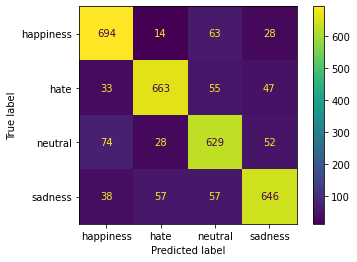

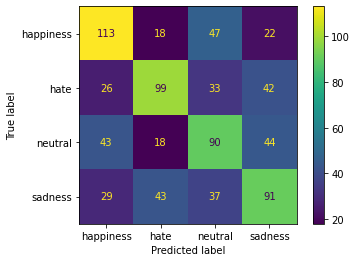

In [ ]:

gs_svc = GridSearchCV(SVC(gamma='auto'), {
    'C': [1, 10, 20, 30, 40],
    'kernel': ['rbf','linear', 'poly']
}, cv=5, return_train_score=False)
gs_svc.fit(X_train, y_train)
gs_svc_df = pd.DataFrame(gs_svc.cv_results_)
best_svc = gs_svc_df[gs_svc_df["mean_test_score"] == gs_svc_df["mean_test_score"].max()]
svc_C_param = best_svc["param_C"]
svc_kernel_param = best_svc["param_kernel"]

#Testing the SVM Model with best parameters obtained
SVM_train_preds = gs_svc.predict(X_train)

# print(confusion_matrix(y_train, SVM_train_preds))
plot_confusion_matrix(gs_svc, X_train, y_train)
print("Accuracy with SVM model's Train Data ", end="")
accuracy_SVM_train = accuracy_score(y_train, SVM_train_preds)
print(accuracy_SVM_train)
print(classification_report(y_train, SVM_train_preds, digits=3))
f1_svm_train = f1_score(y_train, SVM_train_preds, average='micro')
print("F1_Score Train SVM {}".format(f1_svm_train))

SVM_test_preds = gs_svc.predict(X_test)

# print(confusion_matrix(y_test, SVM_test_preds))
plot_confusion_matrix(gs_svc, X_test, y_test)
print("Accuracy with SVM model's Test Data ", end="")
accuracy_SVM_test = accuracy_score(y_test, SVM_test_preds)
print(accuracy_SVM_test)
print(classification_report(y_test, SVM_test_preds, digits=3))

f1_svm_test = f1_score(y_test, SVM_test_preds, average='micro')
print("F1_Score Train SVM {}".format(f1_svm_test))


In [ ]:
svc_C_param

1    1
Name: param_C, dtype: object

In [ ]:
svc_kernel_param

1    linear
Name: param_kernel, dtype: object

In [ ]:
def experiment_SVM(val):
  #Feature Selection with Select K Best and Chi2 Test
  X_new = SelectKBest(chi2, k=val).fit_transform(train, y)
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42, stratify=y)
  gs_svc = GridSearchCV(SVC(gamma='auto'), {
    'C': [1, 10, 20, 30, 40],
    'kernel': ['rbf','linear', 'poly']
  }, cv=5, return_train_score=False)
  gs_svc.fit(X_train, y_train)
  gs_svc_df = pd.DataFrame(gs_svc.cv_results_)
  best_svc = gs_svc_df[gs_svc_df["mean_test_score"] == gs_svc_df["mean_test_score"].max()]
  svc_C_param = best_svc["param_C"]
  svc_kernel_param = best_svc["param_kernel"]

  #Testing the SVM Model with best parameters obtained
  SVM_train_preds_fs = gs_svc.predict(X_train)

  # print(confusion_matrix(train_target, SVM_train_preds))
  # plot_confusion_matrix(gs_svc, X_train, y_train)
  # print("Accuracy with SVM model's Train Data After Feature Selection", end="")
  accuracy_SVM_train_fs = accuracy_score(y_train, SVM_train_preds_fs)
  # print(accuracy_SVM_train_fs)
  # print(classification_report(y_train, SVM_train_preds_fs, digits=3))
  # print("F1_Score Train SVM {}".format(f1_score(y_train, SVM_train_preds_fs)))
  f1_svm_train_fs = f1_score(y_train, SVM_train_preds_fs, average='micro')
  # print("F1_Score Train SVM {}".format(f1_svm_train_fs))
  SVM_test_preds_fs = gs_svc.predict(X_test)

  # print(confusion_matrix(test_target, SVM_test_preds))
  # plot_confusion_matrix(gs_svc, X_test, y_test)
  # print("Accuracy with SVM model's Test Data After Feature Selection", end="")
  accuracy_SVM_test_fs = accuracy_score(y_test, SVM_test_preds_fs)
  # print(accuracy_SVM_test_fs)
  # print(classification_report(y_test, SVM_test_preds_fs, digits=3))
  f1_svm_test_fs = f1_score(y_test, SVM_test_preds_fs, average='micro')
  # print("F1_Score Train SVM {} After Feature Selection".format(f1_svm_test_fs))
  return accuracy_SVM_train_fs, accuracy_SVM_test_fs, f1_svm_train_fs, f1_svm_test_fs

In [ ]:
import numpy as np
maxi_svm = 1
max_ac_test_svm = 0
train_acc_svm_K = list()
test_acc_svm_K = list()
train_f1_svm_K = list()
test_f1_svm_K = list()
for i in np.arange(1, 1500, 100):
  ac_train, ac_test, f1_train, f1_test = experiment_SVM(i)
  train_acc_svm_K.append(ac_train)
  test_acc_svm_K.append(ac_test)
  train_f1_svm_K.append(f1_train)
  test_f1_svm_K.append(f1_test)
  if ac_test > max_ac_test_svm:
    maxi_svm = i
    max_ac_test_svm = ac_test
print(maxi_svm, max_ac_test_svm)
best_svm_ac_train, best_svm_ac_test, best_svm_f1_train, best_svm_f1_test = experiment_SVM(maxi_svm)
print("Best Metric Details After Feature Selection is")
print("Train Accuracy {}".format(best_svm_ac_train))
print("Test Accuracy {}".format(best_svm_ac_test))
print("Train F1 Score {}".format(best_svm_f1_train))
print("Test F1 Score {}".format(best_svm_f1_test))

1401 0.5735849056603773
Best Metric Details After Feature Selection is
Train Accuracy 0.7142857142857143
Test Accuracy 0.5735849056603773
Train F1 Score 0.7142857142857143
Test F1 Score 0.5735849056603773


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Accuracy with NB model's Train Data0.6799874134675897
              precision    recall  f1-score   support

   happiness      0.685     0.747     0.715       799
        hate      0.783     0.670     0.722       798
     neutral      0.568     0.674     0.616       783
     sadness      0.723     0.628     0.672       798

    accuracy                          0.680      3178
   macro avg      0.690     0.680     0.681      3178
weighted avg      0.690     0.680     0.682      3178

F1_Score Train SVM 0.6799874134675897
Accuracy with NB model's Test Data After Feature Selection0.4930817610062893
              precision    recall  f1-score   support

   happiness      0.536     0.565     0.550       200
        hate      0.575     0.480     0.523       200
     neutral      0.402     0.492     0.442       195
     sadness      0.489     0.435     0.460       200

    accuracy                          0.493       795
   macro

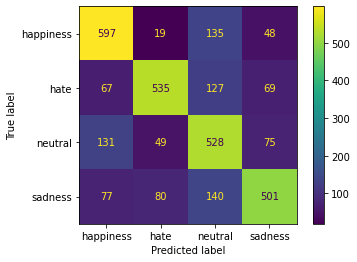

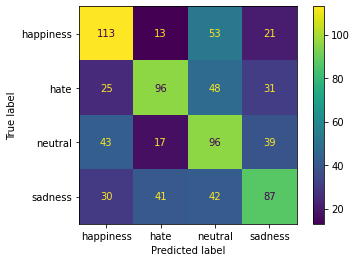

In [ ]:
from sklearn.naive_bayes import BernoulliNB
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'binarize': [None, 0.0, 8.5, 10.0]
         }
gs_nb = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
gs_nb.fit(X_train,y_train)
gs_nb_df = pd.DataFrame(gs_nb.cv_results_)
best_nb = gs_nb_df[gs_nb_df["mean_test_score"] == gs_nb_df["mean_test_score"].max()]

param_binarize = best_nb["param_binarize"]
param_alpha = best_nb["param_alpha"]
param_fit_prior = best_nb["param_fit_prior"]
#Testing the NB Model with best parameters obtained
NB_train_preds = gs_nb.predict(X_train)

# print(confusion_matrix(train_target, NB_train_preds))
plot_confusion_matrix(gs_nb, X_train, y_train)
print("Accuracy with NB model's Train Data", end="")
accuracy_NB_train = accuracy_score(y_train, NB_train_preds)
print(accuracy_NB_train)
print(classification_report(y_train, NB_train_preds, digits=3))
f1_nb_train = f1_score(y_train, NB_train_preds, average='micro')
print("F1_Score Train SVM {}".format(f1_nb_train))

NB_test_preds = gs_nb.predict(X_test)

# print(confusion_matrix(test_target, NB_test_preds))
plot_confusion_matrix(gs_nb, X_test, y_test)
print("Accuracy with NB model's Test Data After Feature Selection", end="")
accuracy_NB_test = accuracy_score(y_test, NB_test_preds)
print(accuracy_NB_test)
print(classification_report(y_test, NB_test_preds, digits=3))
f1_nb_test = f1_score(y_test, NB_test_preds, average='micro')
print("F1_Score Train SVM {}".format(f1_nb_test))



In [ ]:
best_nb
param_alpha
param_fit_prior
param_binarize

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_binarize,param_fit_prior,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
35,0.016976,0.004121,0.002706,0.000176,10.0,0.0,False,"{'alpha': 10.0, 'binarize': 0.0, 'fit_prior': ...",0.435535,0.477987,0.463836,0.533858,0.488189,0.479881,0.032281,1


In [ ]:
def experiment_NB(val):
  X_new = SelectKBest(chi2, k=val).fit_transform(train, y)
  X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42, stratify=y)
  params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'binarize': [None, 0.0, 8.5, 10.0]
         }
  gs_nb = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
  gs_nb.fit(X_train,y_train)
  gs_nb_df = pd.DataFrame(gs_nb.cv_results_)
  best_nb = gs_nb_df[gs_nb_df["mean_test_score"] == gs_nb_df["mean_test_score"].max()]
  param_alpha = best_nb["param_alpha"]
  param_fit_prior = best_nb["param_fit_prior"]
  param_binarize = best_nb["param_binarize"]
  
  #Testing the NB Model with best parameters obtained
  NB_train_preds = gs_nb.predict(X_train)

  # print(confusion_matrix(train_target, NB_train_preds))
  # plot_confusion_matrix(gs_nb, X_train, y_train)
  # print("Accuracy with NB model's Train Data", end="")
  accuracy_NB_train = accuracy_score(y_train, NB_train_preds)
  # print(accuracy_NB_train)
  # print(classification_report(y_train, NB_train_preds, digits=3))
  f1_nb_train = f1_score(y_train, NB_train_preds, average='micro')
  # print("F1_Score Train SVM {}".format(f1_nb_train))

  NB_test_preds = gs_nb.predict(X_test)

  # print(confusion_matrix(test_target, NB_test_preds))
  # plot_confusion_matrix(gs_nb, X_test, y_test)
  # print("Accuracy with NB model's Test Data After Feature Selection", end="")
  accuracy_NB_test = accuracy_score(y_test, NB_test_preds)
  # print(accuracy_NB_test)
  # print(classification_report(y_test, NB_test_preds, digits=3))
  f1_nb_test = f1_score(y_test, NB_test_preds, average='micro')
  # print("F1_Score Train SVM {}".format(f1_nb_test))
  return accuracy_NB_train, accuracy_NB_test, f1_nb_train, f1_nb_test, param_alpha, param_fit_prior, param_binarize

In [ ]:
maxi_nb = 1
max_ac_test_nb = 0
train_acc_nb_K = list()
test_acc_nb_K = list()
train_f1_nb_K = list()
test_f1_nb_K = list()
best_param_alpha = 0
best_param_fit_prior = 0
best_param_binarize = 0
for i in np.arange(50, 1500, 50):
  ac_train, ac_test, f1_train, f1_test, param_alpha, param_fit_prior, param_binarize = experiment_NB(i)
  train_acc_nb_K.append(ac_train)
  test_acc_nb_K.append(ac_test)
  train_f1_nb_K.append(f1_train)
  test_f1_nb_K.append(f1_test)

  if ac_test > max_ac_test_nb:
    maxi_nb = i
    max_ac_test_nb = ac_test
    best_param_alpha = param_alpha
    best_param_fit_prior = param_fit_prior
    best_param_binarize = param_binarize
print(maxi_nb, max_ac_test_nb)
best_nb_ac_train, best_nb_ac_test, best_nb_f1_train, best_nb_f1_test, best_param_alpha1, best_param_fit_prior1, best_param_binarize1 = experiment_NB(maxi_nb)
print("Best Metric Details After Feature Selection is")
print("Train Accuracy {}".format(best_nb_ac_train))
print("Test Accuracy {}".format(best_nb_ac_test))
print("Train F1 Score {}".format(best_nb_f1_train))
print("Test F1 Score {}".format(best_nb_f1_test))
print("bst_param_alpha {}".format(best_param_alpha))
print("bst_param_fitprior {}".format(best_param_fit_prior))
print("bst_param_binarise {}".format(best_param_binarize))
print("bst_param_alpha {}".format(best_param_alpha1))
print("bst_param_fitprior {}".format(best_param_fit_prior1))
print("bst_param_binarise {}".format(best_param_binarize1))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 

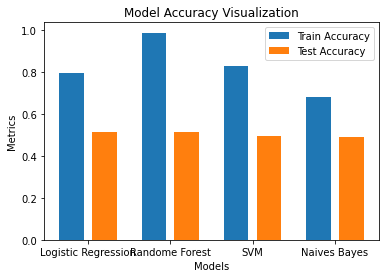

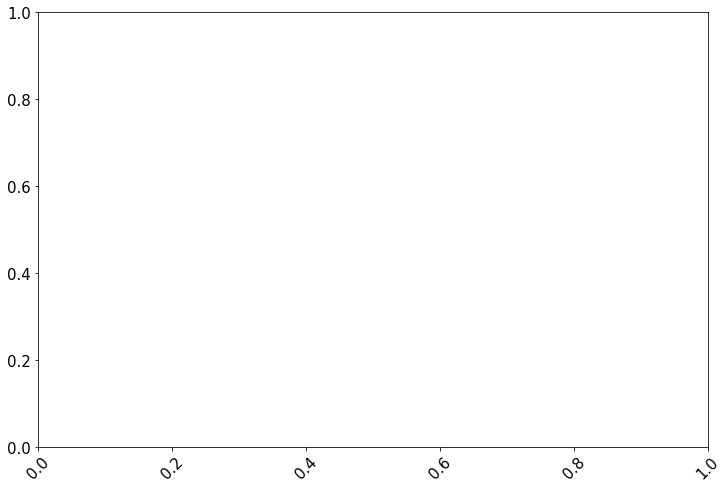

In [ ]:
#Plotting 
import matplotlib.pyplot as plt

X = ['Logistic Regression','Randome Forest', 'SVM', 'Naives Bayes']
X_axis = np.arange(len(X))
train = [accuracy_LogReg_train, accuracy_RandForest_train, accuracy_SVM_train, accuracy_NB_train]
test = [accuracy_LogReg_test, accuracy_RandForest_test, accuracy_SVM_test, accuracy_NB_test]
plt.bar(X_axis - 0.2, train, 0.3, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, test, 0.3, label = 'Test Accuracy')
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Metrics")
plt.title("Model Accuracy Visualization")
plt.legend()
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()


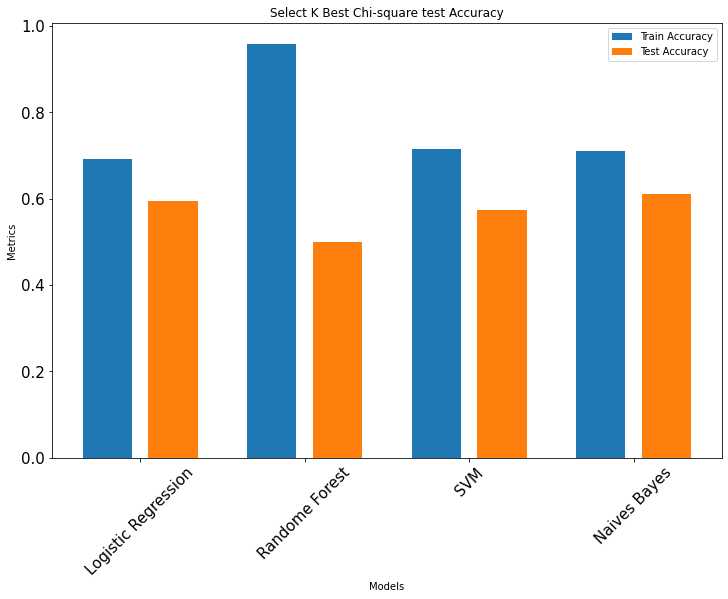

In [ ]:
X = ['Logistic Regression','Randome Forest', 'SVM', 'Naives Bayes']
X_axis = np.arange(len(X))
train = [best_lr_ac_train, best_rf_ac_train, best_svm_ac_train, best_nb_ac_train]
test = [best_lr_ac_test, best_rf_ac_test, best_svm_ac_test, best_nb_ac_test]
plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.2, train, 0.3, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, test, 0.3, label = 'Test Accuracy')
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Metrics")
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Select K Best Chi-square test Accuracy")
plt.legend()
plt.show()

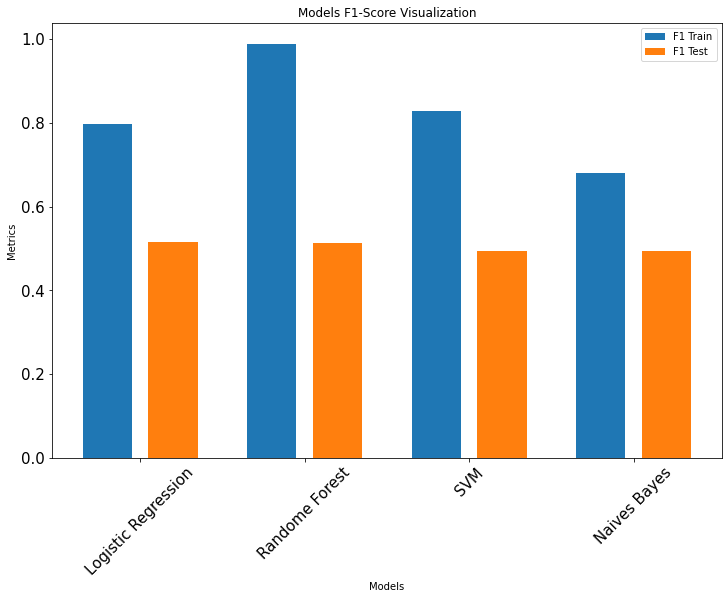

In [ ]:
X = ['Logistic Regression','Randome Forest', 'SVM', 'Naives Bayes']
X_axis = np.arange(len(X))
train = [f1_LogReg_train, f1_rf_train, f1_svm_train, f1_nb_train]
test = [f1_LogReg_test, f1_rf_test, f1_svm_test, f1_nb_test]
plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.2, train, 0.3, label = 'F1 Train')
plt.bar(X_axis + 0.2, test, 0.3, label = 'F1 Test')
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Metrics")
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Models F1-Score Visualization")
plt.xticks(rotation=45)
plt.legend()
plt.show()

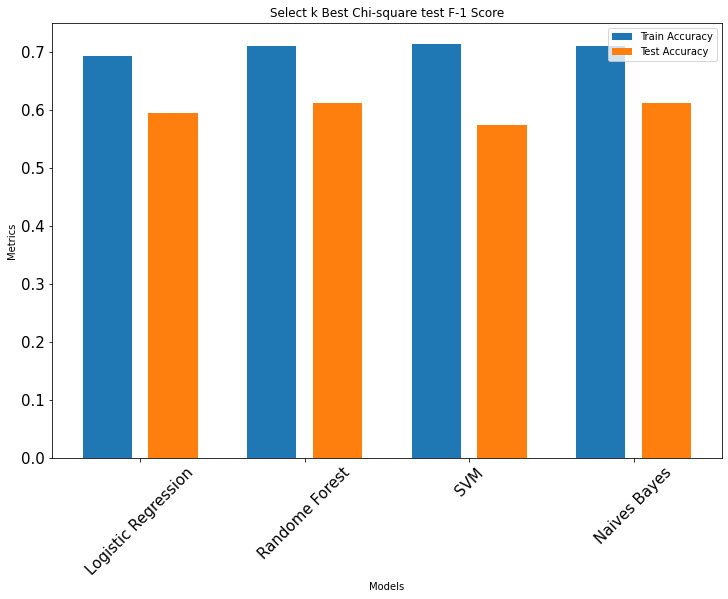

In [ ]:
X = ['Logistic Regression','Randome Forest', 'SVM', 'Naives Bayes']
X_axis = np.arange(len(X))
train = [best_lr_f1_train, best_nb_f1_train, best_svm_f1_train, best_nb_f1_train]
test = [best_lr_f1_test, best_nb_f1_test, best_svm_f1_test, best_nb_f1_test]
plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.2, train, 0.3, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, test, 0.3, label = 'Test Accuracy')
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Metrics")
plt.title("Select k Best Chi-square test F-1 Score")
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=45)
plt.legend()
plt.show()

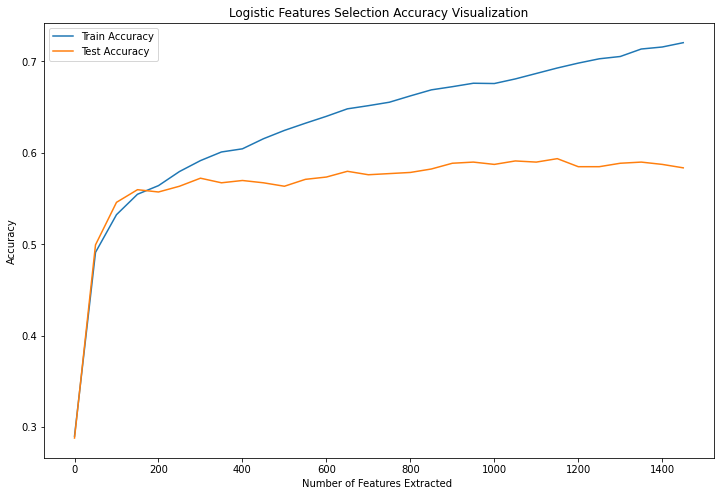

In [ ]:
plt.figure(figsize=(12, 8))
arr = list(np.arange(0, 1500, 50))
plt.plot(arr, train_acc_log_K, label="Train Accuracy")
plt.plot(arr, test_acc_log_K, label="Test Accuracy")
plt.xlabel("Number of Features Extracted ")
plt.ylabel("Accuracy")
plt.title("Logistic Features Selection Accuracy Visualization")
plt.legend()
plt.show()

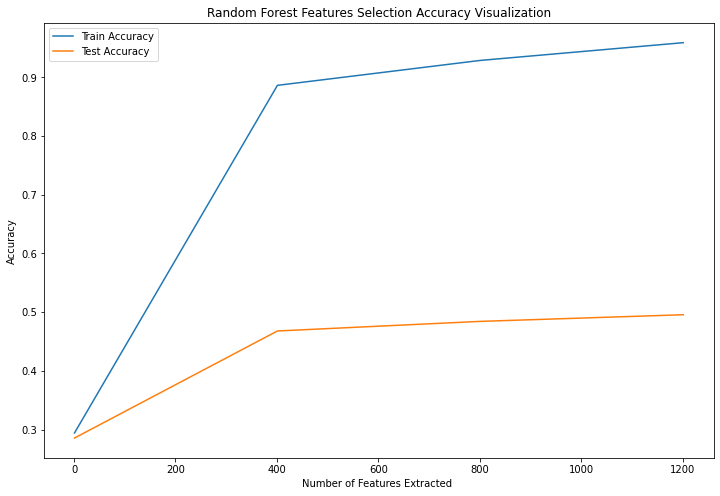

In [ ]:
plt.figure(figsize=(12, 8))
arr = list(np.arange(1, 1500, 400))
plt.plot(arr, train_acc_rf_K, label="Train Accuracy")
plt.plot(arr, test_acc_rf_K, label="Test Accuracy")
plt.xlabel("Number of Features Extracted ")
plt.ylabel("Accuracy")
plt.title("Random Forest Features Selection Accuracy Visualization")
plt.legend()
plt.show()

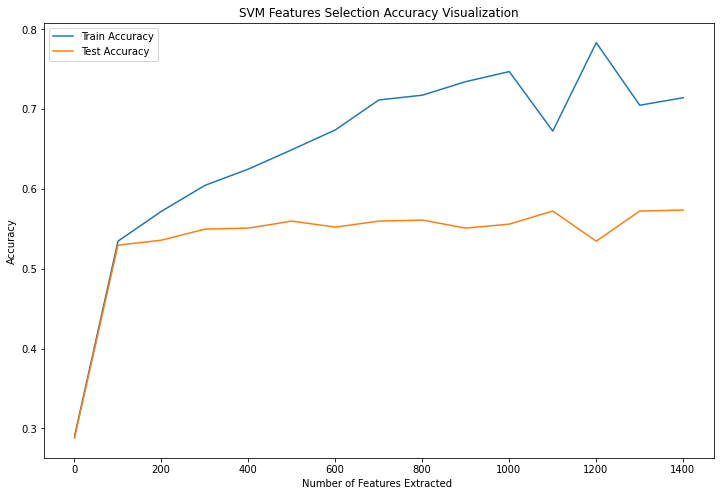

In [ ]:
plt.figure(figsize=(12, 8))
arr = list(np.arange(1, 1500, 100))
plt.plot(arr, train_acc_svm_K, label="Train Accuracy")
plt.plot(arr, test_acc_svm_K, label="Test Accuracy")
plt.xlabel("Number of Features Extracted ")
plt.ylabel("Accuracy")
plt.title("SVM Features Selection Accuracy Visualization")
plt.legend()
plt.show()

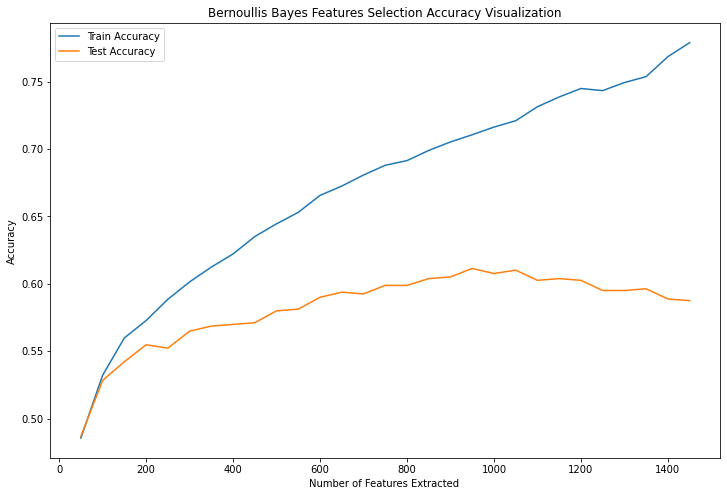

In [ ]:
plt.figure(figsize=(12, 8))
arr = list(np.arange(50, 1500, 50))
plt.plot(arr, train_acc_nb_K, label="Train Accuracy")
plt.plot(arr, test_acc_nb_K, label="Test Accuracy")
plt.xlabel("Number of Features Extracted ")
plt.ylabel("Accuracy")
plt.title("Bernoullis Bayes Features Selection Accuracy Visualization")
plt.legend()
plt.show()

Accuracy with NB model's Train Data0.7067337948395217
              precision    recall  f1-score   support

   happiness      0.790     0.687     0.735       799
        hate      0.804     0.728     0.764       798
     neutral      0.565     0.742     0.642       783
     sadness      0.731     0.670     0.699       798

    accuracy                          0.707      3178
   macro avg      0.722     0.707     0.710      3178
weighted avg      0.723     0.707     0.710      3178

F1_Score Train SVM 0.7067337948395217
Accuracy with NB model's Test Data After Feature Selection0.6125786163522012
              precision    recall  f1-score   support

   happiness      0.686     0.600     0.640       200
        hate      0.686     0.600     0.640       200
     neutral      0.495     0.692     0.577       195
     sadness      0.651     0.560     0.602       200

    accuracy                          0.613       795
   macro avg      0.629     0.613     0.615       795
weighted avg    

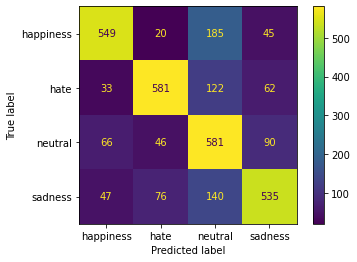

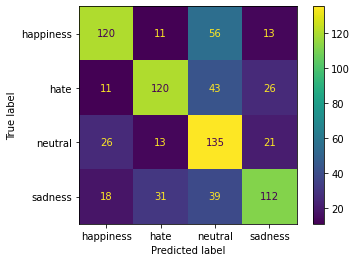

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.naive_bayes import BernoulliNB
  
# train, y, tfidf = emotion_detection.initialize()
#Select K Best Feature Selection Model based on Best features obtained from experimentation
X_new = SelectKBest(chi2, k=900)
new = X_new.fit_transform(train, y)
X_train, X_test, y_train, y_test = train_test_split(new, y, test_size = 0.20, random_state = 42, stratify=y)
#Applying Best Model with Best parameters after experimenting with multiple models
gs_nb = BernoulliNB(fit_prior=True, alpha=0.1, binarize=0.0)
gs_nb.fit(X_train, y_train)
# X_train = new
# y_train = y
NB_train_preds = gs_nb.predict(X_train)

# print(confusion_matrix(train_target, NB_train_preds))
plot_confusion_matrix(gs_nb, X_train, y_train)
print("Accuracy with NB model's Train Data", end="")
accuracy_NB_train = accuracy_score(y_train, NB_train_preds)
print(accuracy_NB_train)
print(classification_report(y_train, NB_train_preds, digits=3))
f1_nb_train = f1_score(y_train, NB_train_preds, average='micro')
print("F1_Score Train SVM {}".format(f1_nb_train))

NB_test_preds = gs_nb.predict(X_test)

# print(confusion_matrix(test_target, NB_test_preds))
plot_confusion_matrix(gs_nb, X_test, y_test)
print("Accuracy with NB model's Test Data After Feature Selection", end="")
accuracy_NB_test = accuracy_score(y_test, NB_test_preds)
print(accuracy_NB_test)
print(classification_report(y_test, NB_test_preds, digits=3))
f1_nb_test = f1_score(y_test, NB_test_preds, average='micro')
print("F1_Score Train SVM {}".format(f1_nb_test))
